# Scatter plots

So far we have only looked at one variable at a time. In Two variables are related if knowing one gives you information about the other. For example, height and weight are related; people who are taller tend to be heavier. Of course, it is not a perfect relationship: there are short heavy people and tall light ones. But if you are trying to guess someone’s weight, you will be more accurate if you know their height than if you don’t.

Scatter plots provide a general impression of the relationship between variables, but there are other visualizations that provide more insight into the nature of the relation‐ship. One option is to bin one variable and plot percentiles of the other.

In [50]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn style
sns.set()

In [68]:
"""Funciones especiales"""

# Importamos la biblioteca necesaria para enlazar con el archivo requerido
import sys
sys.path.insert(0, '../statistics')

# importamos la función que necesitamos
#from DataManipulation import SampleRows
import DataManipulation as dm

In [66]:
def SampleRows(df, nrows, replace=False):
    """
    function that takes random samples from a DataFrame.
    
    Args:
        df(DataFrame): DataFrame
        nrows (int): number of rows
        replace (boolean): if we want repeat values or not.
        
    Returns:
        Returns a dataframe with the numbers of rows indicate.
    """
    # select random indices
    indices = np.random.choice(df.index, size=nrows, replace=replace)
    
    # sample
    sample = df.loc[indices]
    
    return sample

In [71]:
# DataFrame example
df = pd.read_csv('data/TSheightweight.csv', header=0, index_col=0)

# select five thousand of rows
sample = SampleRows(df=df, nrows=5000)

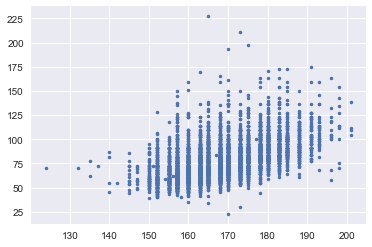

In [72]:
# selecting values
height, weight = sample['htm3'], sample['wtkg2']

#plot the posible relationship between height and weight
plt.plot(height, weight, marker='.', linestyle='none')
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# show the plot
plt.show()

But this is not the best representation of the data, because the data are packed into columns. The problem is that the heights are rounded to the nearest inch, converted to centimeters, and then rounded again. Some information is lost in translation. We can’t get that information back, but *we can minimize* the effect on the scatter plot by **jittering** the data, which means adding *random noise* to reverse the effect of rounding off. Since these measurements were rounded to the nearest inch, they might be off by up to 0.5 inches or 1.3 cm. Similarly, the weights might be off by 0.5 kg.

In [73]:
# Jitter definition
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.uniform(-jitter, +jitter, n) + values

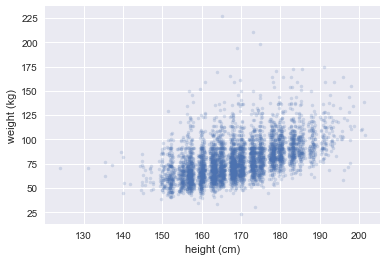

In [76]:
# jittering the data
height = Jitter(height)
weight = Jitter(weight)

# plot the new results
plt.plot(height, weight, marker='.', linestyle='none', alpha=0.2)
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# show the plot
plt.show()

To handle larger datasets, another option is a hexbin plot, which divides the graph into hexagonal bins and colors each bin according to how many data points fall in it.

/home/pablo/Programas/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


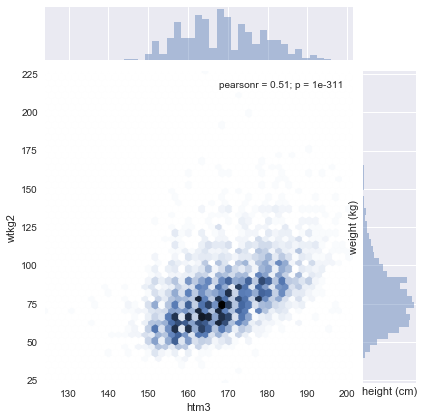

In [79]:
# hexbins
sns.jointplot(x=height, y=weight, kind='hex')
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# show the plot
plt.show()

## Characterizing Relationships

Scatter plots provide a general impression of the relationship between variables, but there are other visualizations that provide more insight into the nature of the relation‐ship. One option is to bin one variable and plot percentiles of the other.
